Basic analyses of behavior in the FHT task. 

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import entropy
import math

# 1. Load and prep data

In [2]:
behav_data = pd.read_csv(os.getcwd() + '/ProcessedData/CleanedProcessedBehavioralData.csv')
behav_data

In [ ]:
prechoice_df = pd.read_csv(os.getcwd() + '/ProcessedData/PreChoice_Processed_CombinedBehavioralEyetrackingData.csv')
prechoice_df

In [ ]:
# post_relative_looking_time_df = pd.read_csv('ProcessedData/PostChoice_RelativeLookingTimes.csv')
feedback_df = pd.read_csv(os.getcwd() + '/ProcessedData/Feedback_Processed_CombinedBehavioralEyetrackingData.csv')
feedback_df

# Age as a Continuous Measure

In [45]:
def calculateEntropy(featureList, base):
    entropy_list = []
    for probFeat in featureList:
        if probFeat != 0:
            entropy_list.append(probFeat*math.log(probFeat, base))
        else:
            entropy_list.append(0)
    return -np.nansum(entropy_list)

In [49]:
# Calculate average entropy for each participant
average_dim_prechoice = prechoice_df.groupby(['Subj', 'Age'])['DimensionEntropy'].mean().reset_index()
average_feat_prechoice = prechoice_df.groupby(['Subj', 'Age'])['FeatureEntropy'].mean().reset_index()
average_feedback = feedback_df.groupby(['Subj', 'Age'])['Entropy'].mean().reset_index()

In [50]:
# bin by age groups
age_bin = []
for item, row in average_dim_prechoice.iterrows():
    if row.Age <= 14:
        age_bin.append('12-14')
    elif row.Age <= 16:
        age_bin.append('14-16')
    elif row.Age <= 18:
        age_bin.append('16-18')
    elif row.Age <= 20:
        age_bin.append('18-20')
    elif row.Age <= 22:
        age_bin.append('20-22')
    elif row.Age <= 24:
        age_bin.append('22-24')
    else:
        age_bin.append('>24')
average_dim_prechoice['AgeBin'] = age_bin
average_feat_prechoice['AgeBin'] = age_bin
average_feedback['AgeBin'] = age_bin

In [51]:
prechoice_df = pd.merge(prechoice_df, average_feedback[['AgeBin', 'Subj']],  how='left', on=['Subj'])
feedback_df = pd.merge(feedback_df, average_feedback[['AgeBin', 'Subj']],  how='left', on=['Subj'])
age_bin_order = ['12-14', '14-16', '16-18','18-20','20-22', '22-24', '>24']

## Over all participants

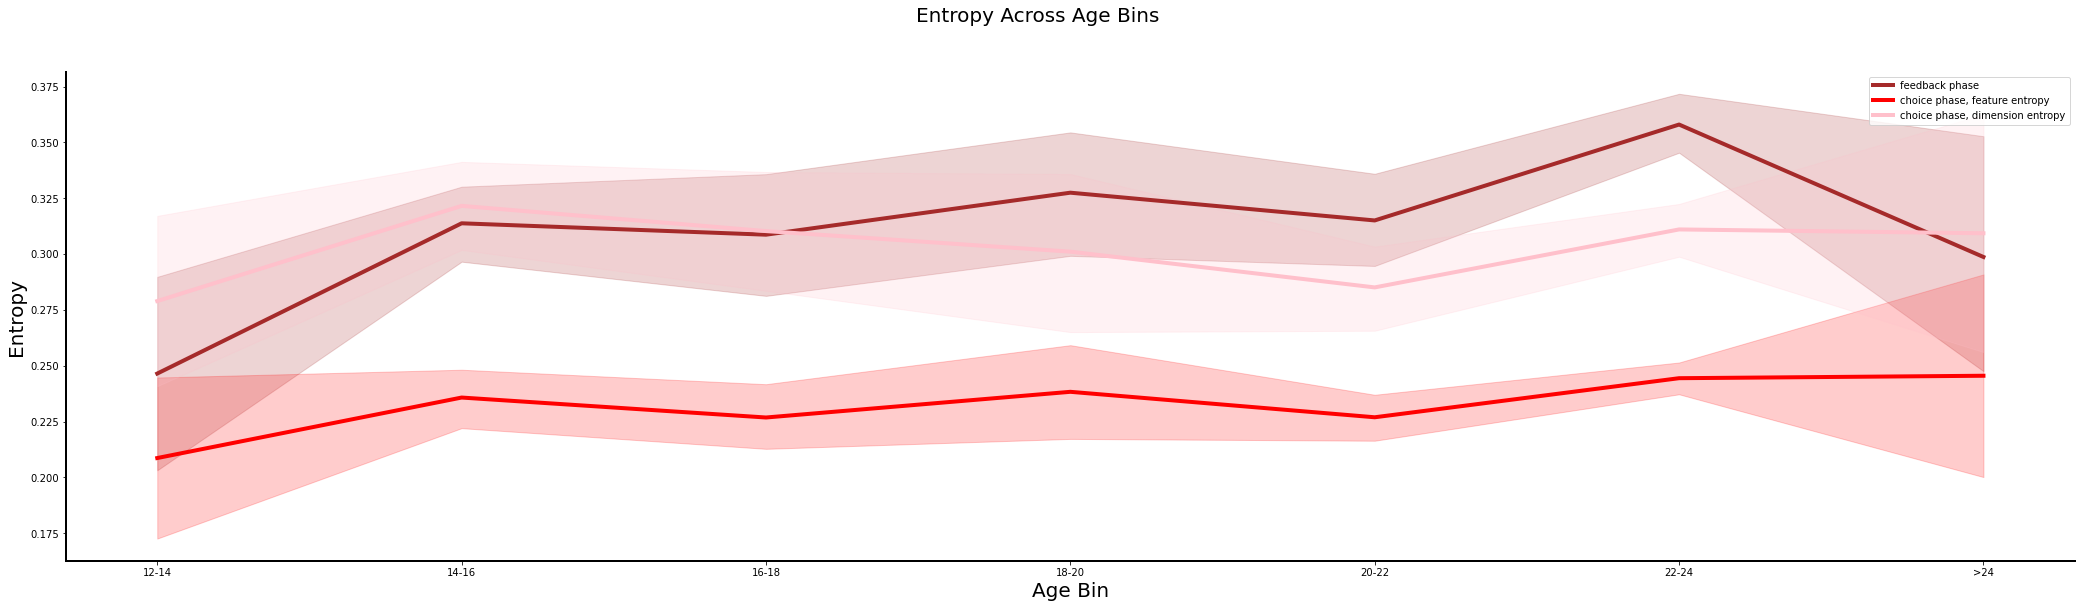

In [38]:
feedback = pd.melt(average_feedback, col_level=0, id_vars='AgeBin', value_vars=['Entropy']).set_index("AgeBin").loc[age_bin_order]
prechoice_feature = pd.melt(average_feat_prechoice, col_level=0, id_vars='AgeBin', value_vars=['FeatureEntropy']).set_index(f"AgeBin").loc[age_bin_order]
prechoice_dimension = pd.melt(average_dim_prechoice, col_level=0, id_vars='AgeBin', value_vars=['DimensionEntropy']).set_index(f"AgeBin").loc[age_bin_order]

fig, ax1 = plt.subplots(figsize=(36,9))
fig.suptitle('Entropy Across Age Bins',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'AgeBin', y="value", err_style="band", ci=68, data=feedback.reset_index(), lw=4, legend='brief', label='feedback phase', color='brown')
l2 = sns.lineplot(ax = ax1, x = 'AgeBin', y="value", err_style="band", ci=68, data=prechoice_feature.reset_index(), lw=4, legend='brief', label='choice phase, feature entropy', color='red')
l3 = sns.lineplot(ax = ax1, x = 'AgeBin', y="value", err_style="band", ci=68, data=prechoice_dimension.reset_index(), lw=4, legend='brief', label='choice phase, dimension entropy', color='pink')
l2.set(ylabel=None)
sns.despine()
#ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(age_bin_order)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Age Bin',fontsize = 20);
yl = ax1.set_ylabel('Entropy',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')

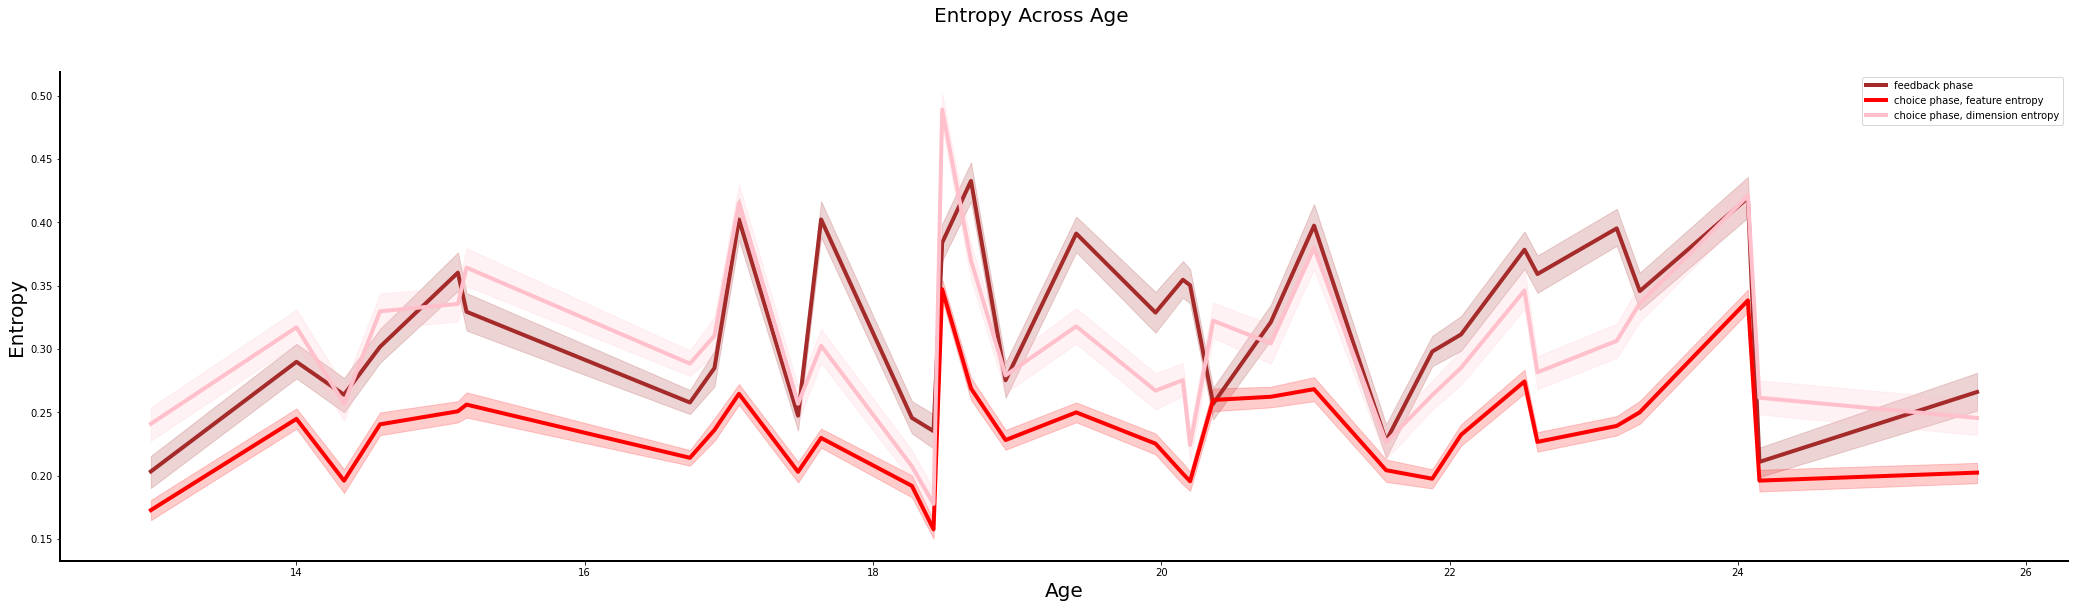

In [15]:
feedback = pd.melt(feedback_df, col_level=0, id_vars='Age', value_vars=['Entropy'])
prechoice_feature = pd.melt(prechoice_df, col_level=0, id_vars='Age', value_vars=['FeatureEntropy'])
prechoice_dimension = pd.melt(prechoice_df, col_level=0, id_vars='Age', value_vars=['DimensionEntropy'])

fig, ax1 = plt.subplots(figsize=(36,9))
fig.suptitle('Entropy Across Age',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'Age', y="value", err_style="band", ci=68, data=feedback, lw=4, legend='brief', label='feedback phase', color='brown')
l2 = sns.lineplot(ax = ax1, x = 'Age', y="value", err_style="band", ci=68, data=prechoice_feature, lw=4, legend='brief', label='choice phase, feature entropy', color='red')
l3 = sns.lineplot(ax = ax1, x = 'Age', y="value", err_style="band", ci=68, data=prechoice_dimension, lw=4, legend='brief', label='choice phase, dimension entropy', color='pink')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Age',fontsize = 20);
yl = ax1.set_ylabel('Entropy',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')

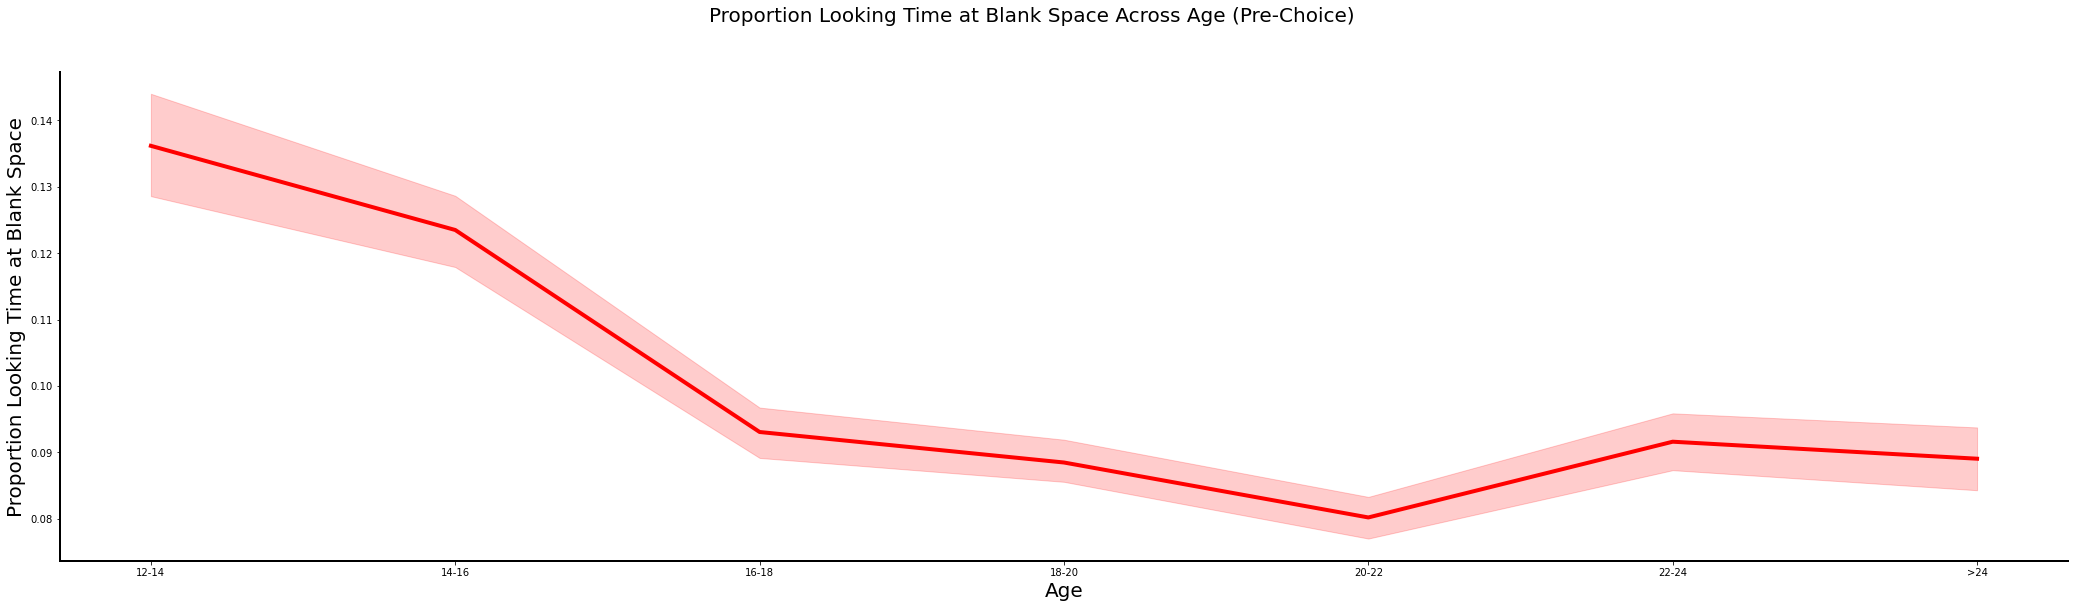

In [53]:
prechoice = pd.melt(prechoice_df, col_level=0, id_vars='AgeBin', value_vars=['Feature10']).set_index("AgeBin").loc[age_bin_order].reset_index()

fig, ax1 = plt.subplots(figsize=(36,9))
fig.suptitle('Proportion Looking Time at Blank Space Across Age (Pre-Choice)',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'AgeBin', y="value", err_style="band", ci=68, data=prechoice, lw=4, legend='brief', label='', color='red')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Age',fontsize = 20);
yl = ax1.set_ylabel('Proportion Looking Time at Blank Space',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')

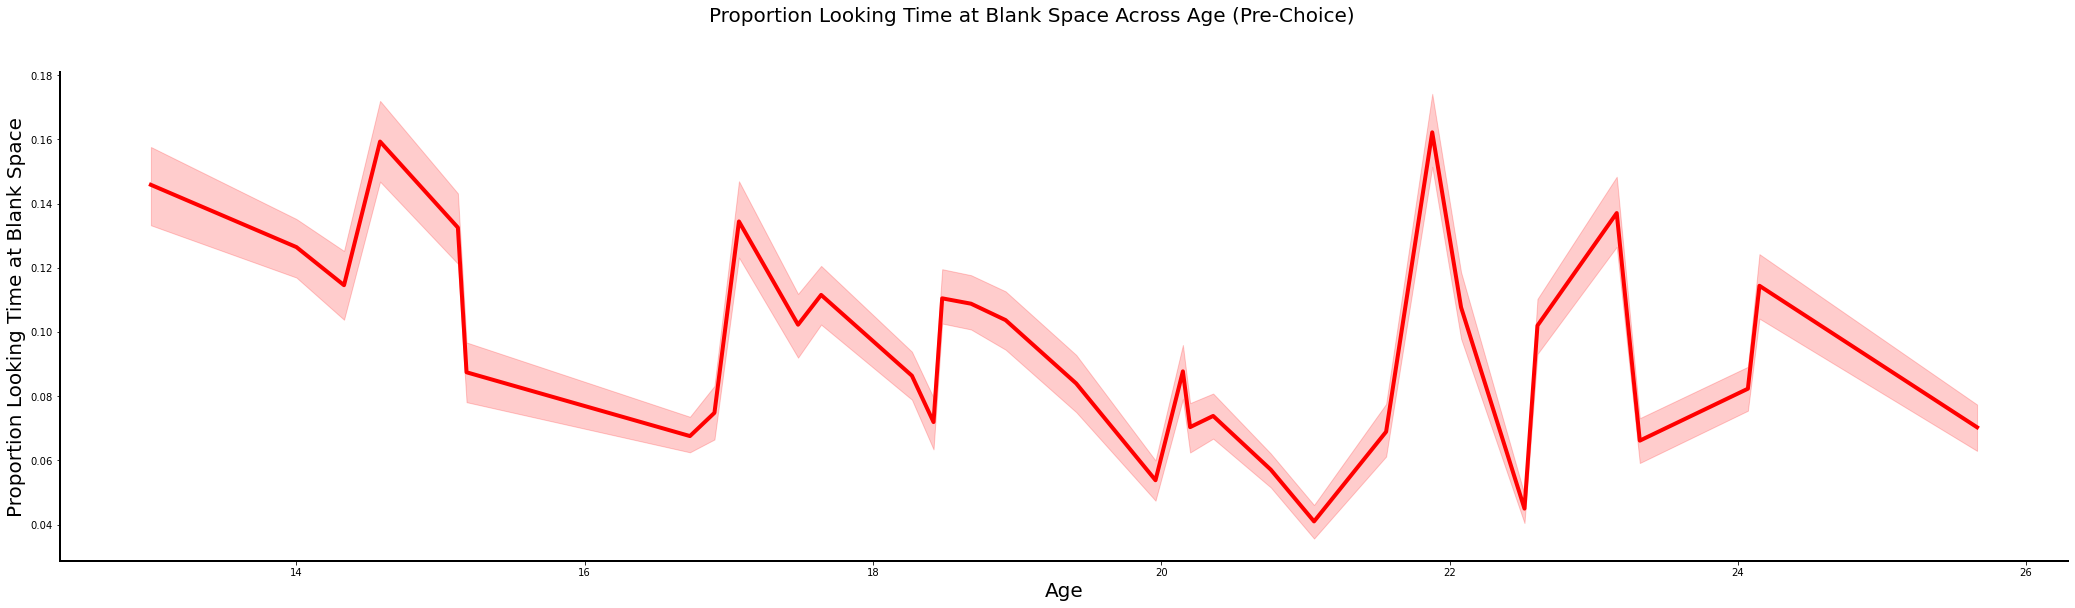

In [17]:
prechoice = pd.melt(prechoice_df, col_level=0, id_vars='Age', value_vars=['Feature10'])

fig, ax1 = plt.subplots(figsize=(36,9))
fig.suptitle('Proportion Looking Time at Blank Space Across Age (Pre-Choice)',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'Age', y="value", err_style="band", ci=68, data=prechoice, lw=4, legend='brief', label='', color='red')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Age',fontsize = 20);
yl = ax1.set_ylabel('Proportion Looking Time at Blank Space',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')

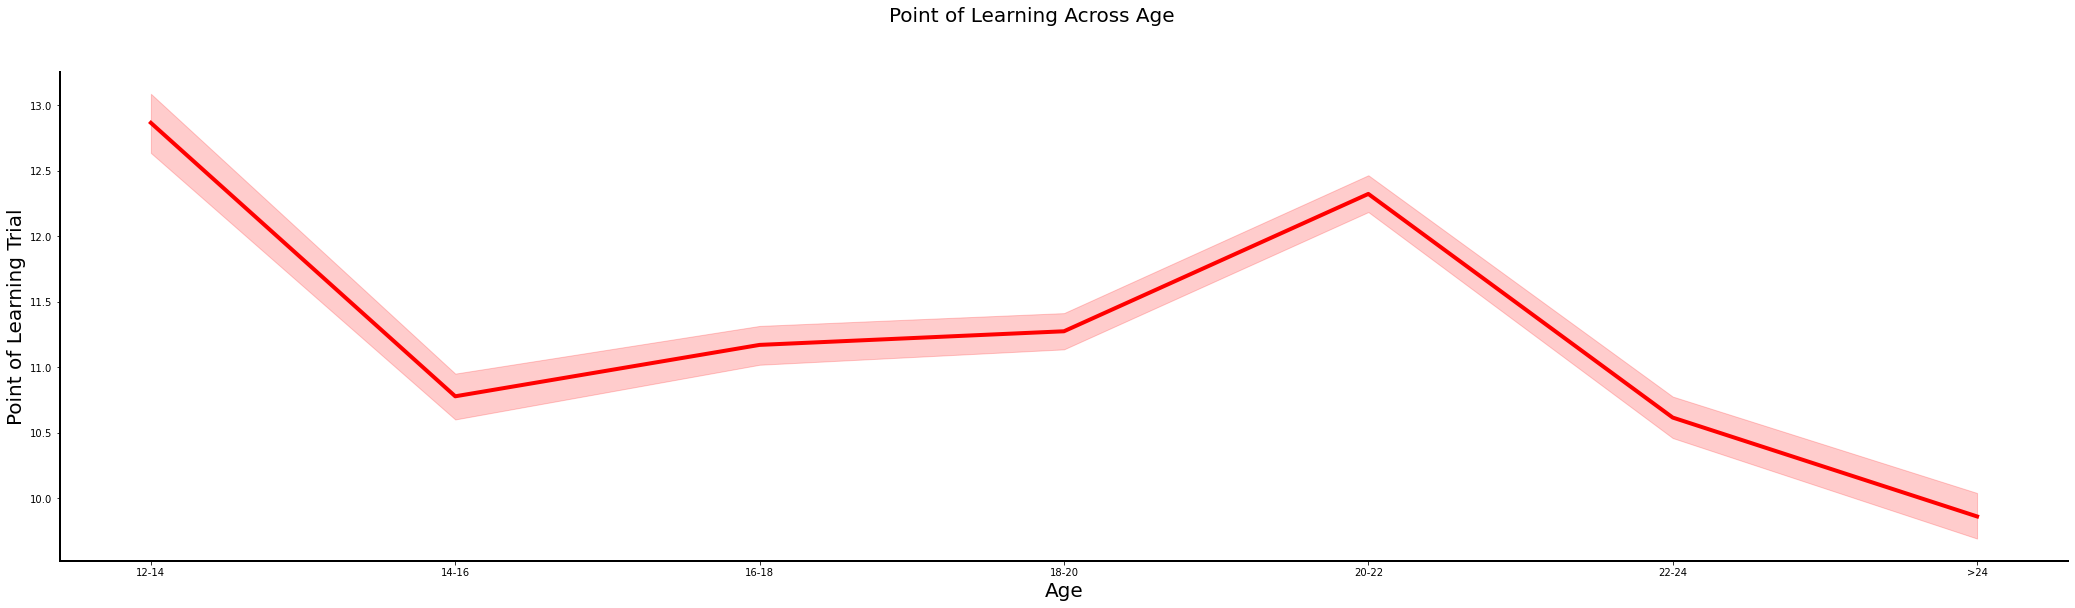

In [54]:
behav_df = pd.melt(prechoice_df, col_level=0, id_vars='AgeBin', value_vars=['PoL']).set_index("AgeBin").loc[age_bin_order].reset_index()

fig, ax1 = plt.subplots(figsize=(36,9))
fig.suptitle('Point of Learning Across Age',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'AgeBin', y="value", err_style="band", ci=68, data=behav_df, lw=4, legend='brief', label='', color='red')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Age',fontsize = 20);
yl = ax1.set_ylabel('Point of Learning Trial',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')

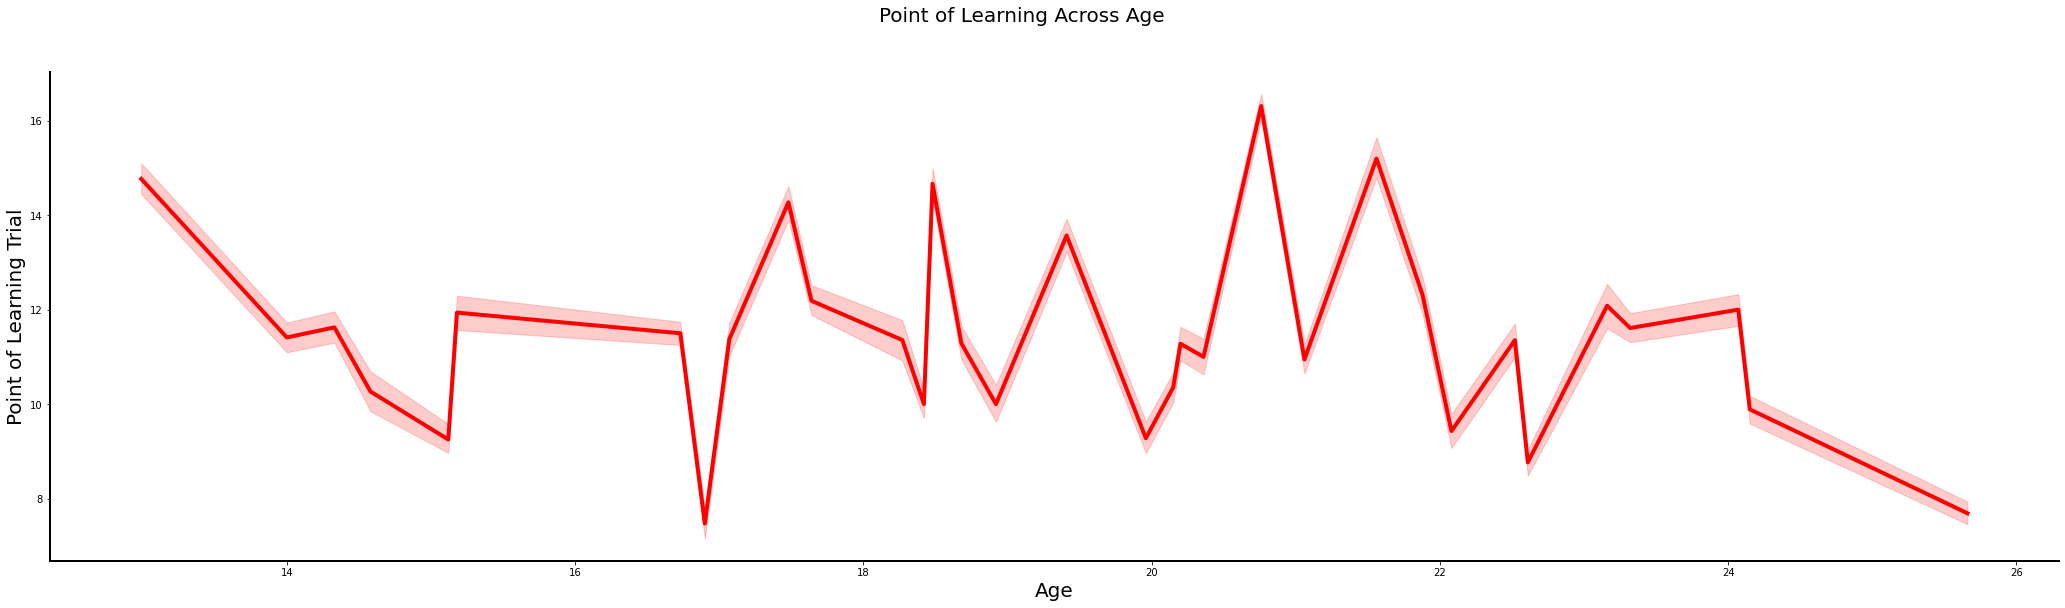

In [21]:
behav_df = pd.melt(prechoice_df, col_level=0, id_vars='Age', value_vars=['PoL'])

fig, ax1 = plt.subplots(figsize=(36,9))
fig.suptitle('Point of Learning Across Age',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'Age', y="value", err_style="band", ci=68, data=behav_df, lw=4, legend='brief', label='', color='red')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Age',fontsize = 20);
yl = ax1.set_ylabel('Point of Learning Trial',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')

## Separate by learned and not learned

In [57]:
learned_prechoice = prechoice_df.loc[prechoice_df['LearnedFeat']]
unlearned_prechoice = prechoice_df[prechoice_df['LearnedFeat'] == False]
learned_feedback = feedback_df.loc[feedback_df['LearnedFeat']]
unlearned_feedback = feedback_df[feedback_df['LearnedFeat'] == False]

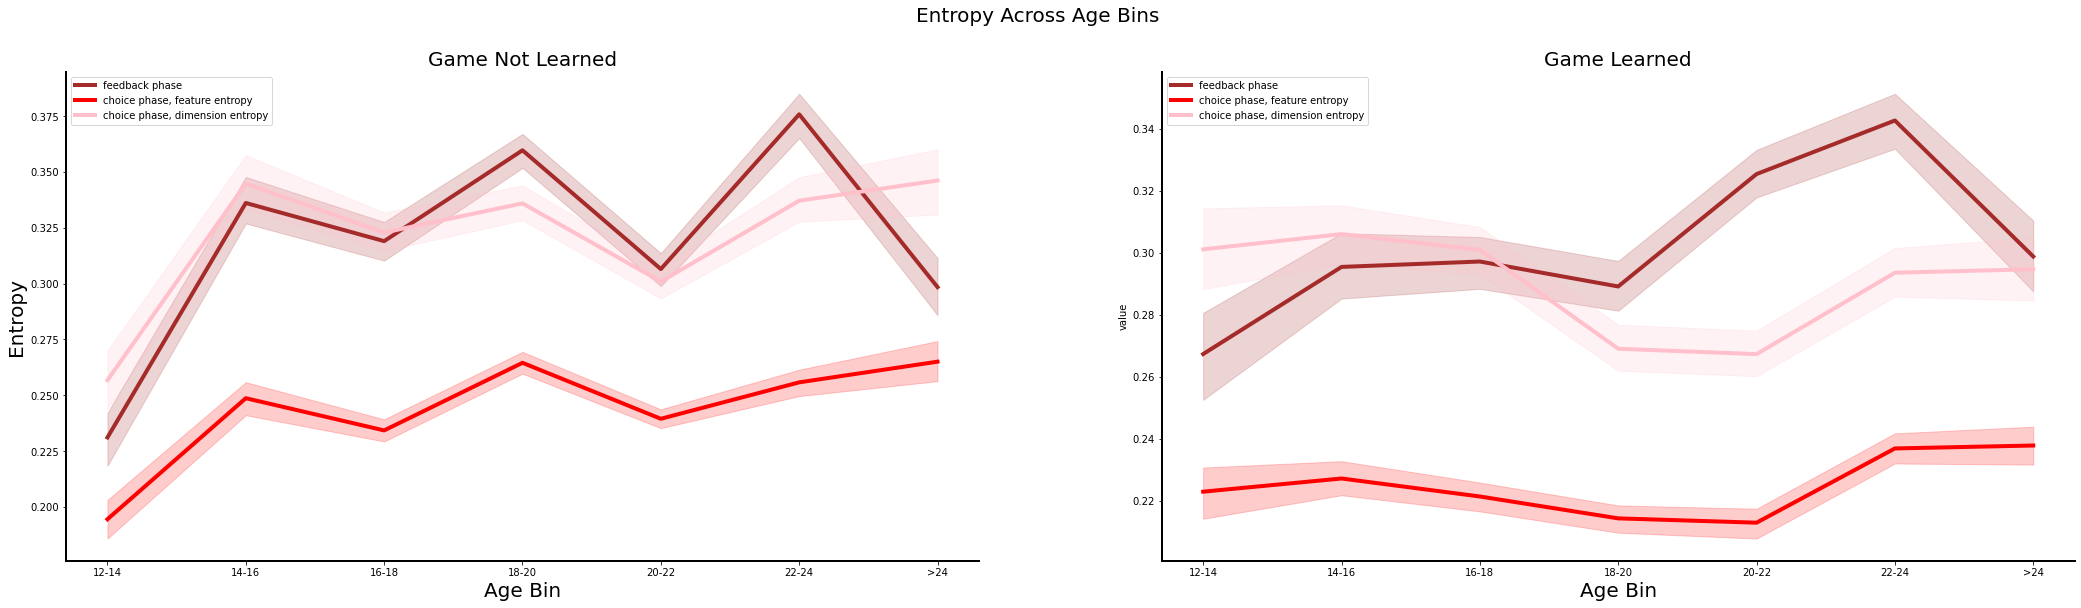

In [58]:
learned_fb = pd.melt(learned_feedback, col_level=0, id_vars='AgeBin', value_vars=['Entropy']).set_index("AgeBin").loc[age_bin_order].reset_index()
learned_pc_feature = pd.melt(learned_prechoice, col_level=0, id_vars='AgeBin', value_vars=['FeatureEntropy']).set_index(f"AgeBin").loc[age_bin_order].reset_index()
learned_pc_dimension = pd.melt(learned_prechoice, col_level=0, id_vars='AgeBin', value_vars=['DimensionEntropy']).set_index(f"AgeBin").loc[age_bin_order].reset_index()

unlearned_fb = pd.melt(unlearned_feedback, col_level=0, id_vars='AgeBin', value_vars=['Entropy']).set_index("AgeBin").loc[age_bin_order].reset_index()
unlearned_pc_feature = pd.melt(unlearned_prechoice, col_level=0, id_vars='AgeBin', value_vars=['FeatureEntropy']).set_index(f"AgeBin").loc[age_bin_order].reset_index()
unlearned_pc_dimension = pd.melt(unlearned_prechoice, col_level=0, id_vars='AgeBin', value_vars=['DimensionEntropy']).set_index(f"AgeBin").loc[age_bin_order].reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(36,9))
fig.suptitle('Entropy Across Age Bins',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax2, x = 'AgeBin', y="value", err_style="band", ci=68, data=learned_fb, lw=4, legend='brief', label='feedback phase', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'AgeBin', y="value", err_style="band", ci=68, data=learned_pc_feature, lw=4, legend='brief', label='choice phase, feature entropy', color='red')
l3 = sns.lineplot(ax = ax2, x = 'AgeBin', y="value", err_style="band", ci=68, data=learned_pc_dimension, lw=4, legend='brief', label='choice phase, dimension entropy', color='pink')

l4 = sns.lineplot(ax = ax1, x = 'AgeBin', y="value", err_style="band", ci=68, data=unlearned_fb, lw=4, legend='brief', label='feedback phase', color='brown')
l5 = sns.lineplot(ax = ax1, x = 'AgeBin', y="value", err_style="band", ci=68, data=unlearned_pc_feature, lw=4, legend='brief', label='choice phase, feature entropy', color='red')
l6 = sns.lineplot(ax = ax1, x = 'AgeBin', y="value", err_style="band", ci=68, data=unlearned_pc_dimension, lw=4, legend='brief', label='choice phase, dimension entropy', color='pink')

sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Age Bin',fontsize = 20);
yl = ax1.set_ylabel('Entropy',fontsize = 20);
x2 = ax2.set_xlabel('Age Bin',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')

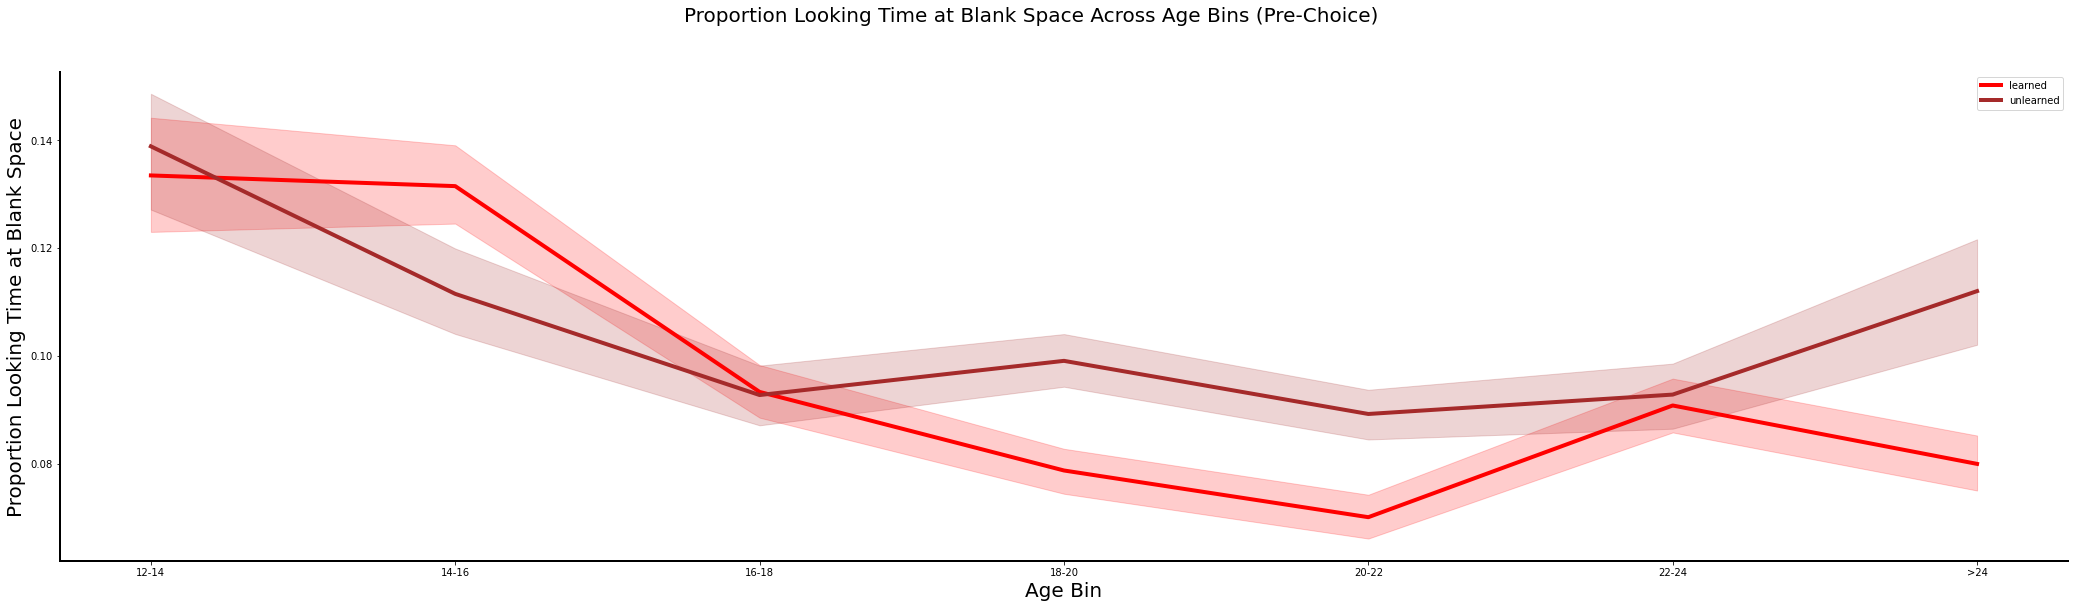

In [61]:
learned_df = pd.melt(learned_prechoice, col_level=0, id_vars='AgeBin', value_vars=['Feature10']).set_index("AgeBin").loc[age_bin_order].reset_index()
unlearned_df = pd.melt(unlearned_prechoice, col_level=0, id_vars='AgeBin', value_vars=['Feature10']).set_index("AgeBin").loc[age_bin_order].reset_index()

fig, ax1 = plt.subplots(figsize=(36,9))
fig.suptitle('Proportion Looking Time at Blank Space Across Age Bins (Pre-Choice)',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'AgeBin', y="value", err_style="band", ci=68, data=learned_df, lw=4, legend='brief', label='learned', color='red')
l2 = sns.lineplot(ax = ax1, x = 'AgeBin', y="value", err_style="band", ci=68, data=unlearned_df, lw=4, legend='brief', label='unlearned', color='brown')
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Age Bin',fontsize = 20);
yl = ax1.set_ylabel('Proportion Looking Time at Blank Space',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')

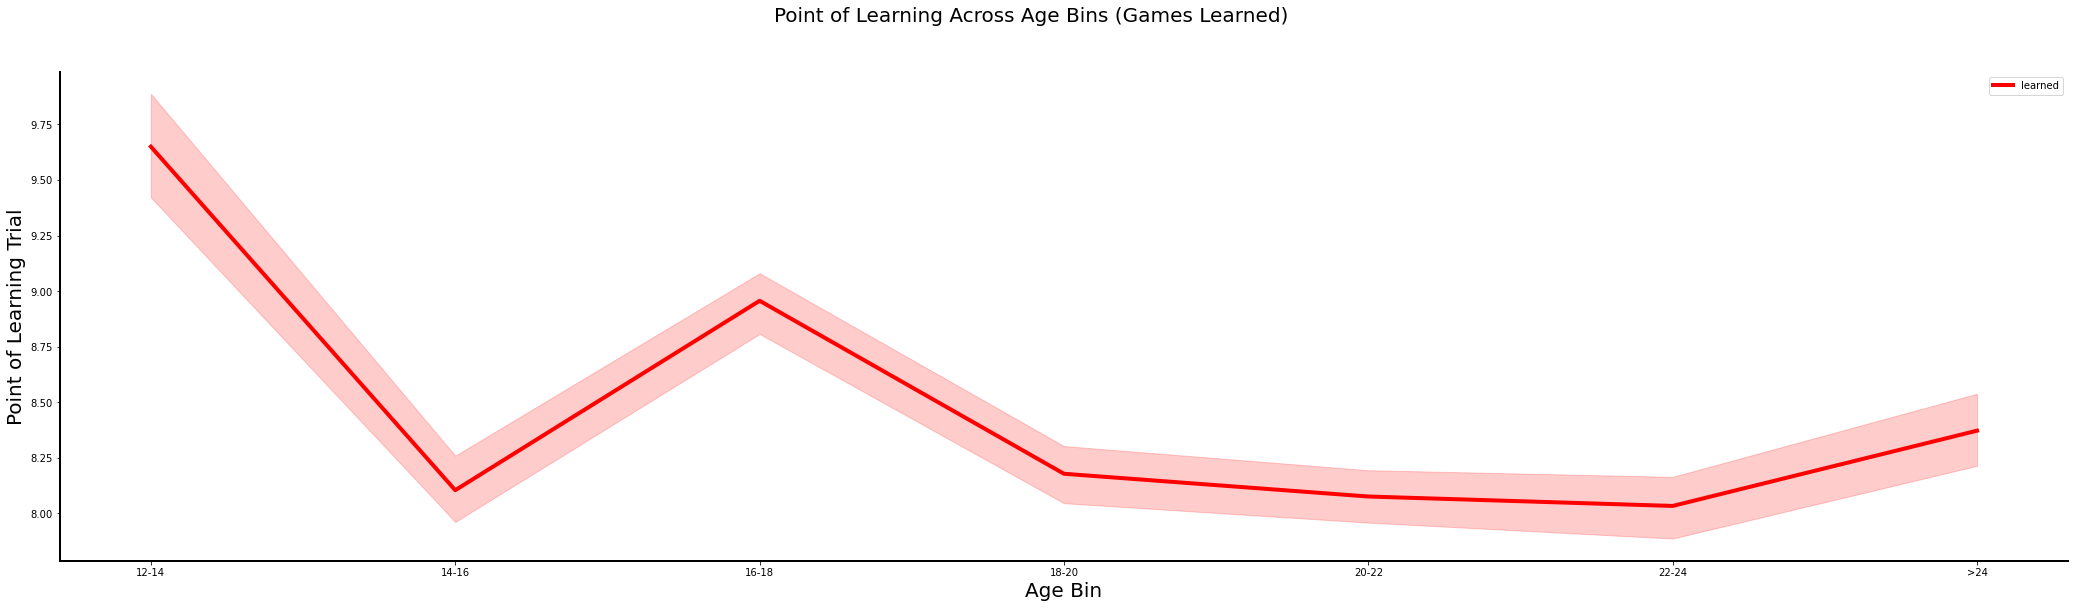

In [64]:
learned_df = pd.melt(learned_prechoice, col_level=0, id_vars='AgeBin', value_vars=['PoL']).set_index("AgeBin").loc[age_bin_order].reset_index()
# unlearned_df = pd.melt(unlearned_prechoice, col_level=0, id_vars='AgeBin', value_vars=['PoL']).set_index("AgeBin").loc[age_bin_order].reset_index()

fig, ax1 = plt.subplots(figsize=(36,9))
fig.suptitle('Point of Learning Across Age Bins (Games Learned)',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'AgeBin', y="value", err_style="band", ci=68, data=learned_df, lw=4, legend='brief', label='learned', color='red')
# l2 = sns.lineplot(ax = ax1, x = 'AgeBin', y="value", err_style="band", ci=68, data=unlearned_df, lw=4, legend='brief', label='unlearned', color='brown')
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Age Bin',fontsize = 20);
yl = ax1.set_ylabel('Point of Learning Trial',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')

# Dump

In [34]:
pd.DataFrame.from_dict(numCorrectOnSubsequentTrials).sort_values(['Subj','Game'], ascending = (True, True)).reset_index(drop=True)

,Subj,Game,WithinGameTrial,SubsequentCorrect,EightyPercent
0,23.0,1.0,1,15.0,False
1,23.0,1.0,2,14.0,False
2,23.0,1.0,3,13.0,False
3,23.0,1.0,4,13.0,False
4,23.0,1.0,5,12.0,False
...,...,...,...,...,...
15195,71.0,20.0,16,5.0,True
15196,71.0,20.0,17,4.0,True
15197,71.0,20.0,18,3.0,True
15198,71.0,20.0,19,2.0,True


In [19]:
subsequentcorrect_df = pd.DataFrame.from_dict(numCorrectOnSubsequentTrials).sort_values(['Subj','Game'], ascending = (True, True)).reset_index(drop=True) #.rename(columns={"Correct": "SubsequentCorrect"})

Subj                 23.0
Game                  1.0
WithinGameTrial      11.0
SubsequentCorrect     8.0
EightyPercent        11.0
Name: 10, dtype: float64
Subj                 23.0
Game                  1.0
WithinGameTrial      16.0
SubsequentCorrect     4.0
EightyPercent        16.0
Name: 15, dtype: float64
Subj                 23.0
Game                  1.0
WithinGameTrial      18.0
SubsequentCorrect     3.0
EightyPercent        18.0
Name: 17, dtype: float64
Subj                 23.0
Game                  1.0
WithinGameTrial      19.0
SubsequentCorrect     2.0
EightyPercent        19.0
Name: 18, dtype: float64
Subj                 23.0
Game                  1.0
WithinGameTrial      20.0
SubsequentCorrect     1.0
EightyPercent        20.0
Name: 19, dtype: float64
Subj                 23.0
Game                  2.0
WithinGameTrial       1.0
SubsequentCorrect    18.0
EightyPercent         1.0
Name: 20, dtype: float64
Subj                 23.0
Game                  2.0
WithinGameTrial   